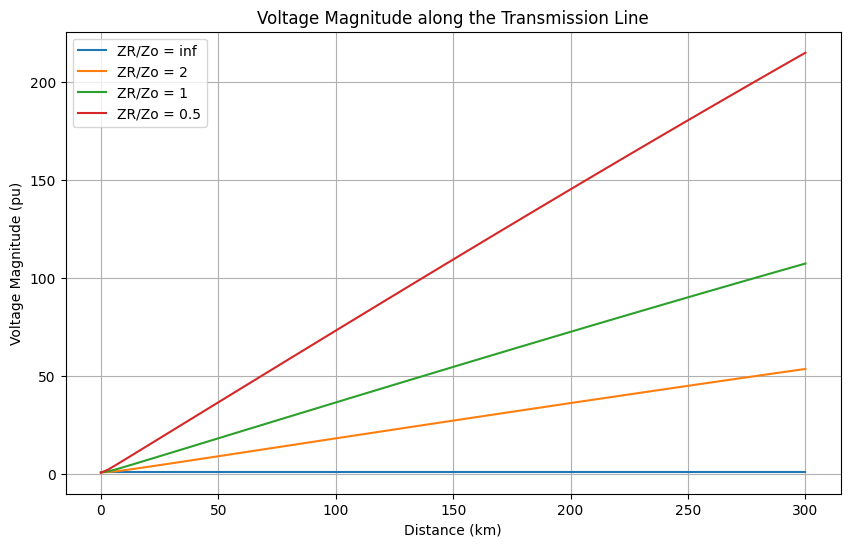

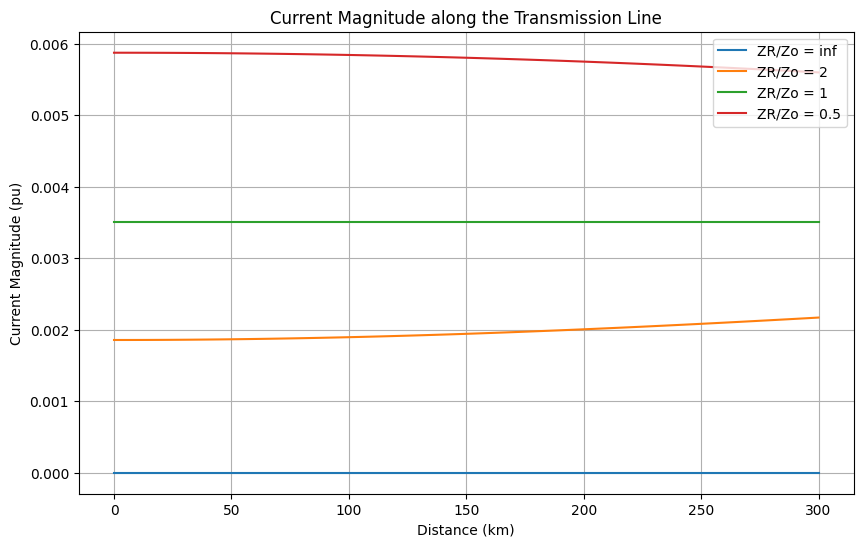

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Vs = 1.0  # Sending end voltage in pu
Zo = 285  # Surge impedance in Ohms
beta = 0.00129  # Propagation constant in rad/km
l = 300  # Line length in km
Z_ratios = [np.inf, 2, 1, 0.5]  # Different ZR/Zo ratios

# Function to calculate voltage magnitude along the line
def voltage_profile(Z_ratio, x):
    if Z_ratio == np.inf:
        return Vs * np.ones_like(x)
    Vr_real = Vs / (np.cos(beta * l) + 1j * (1/Z_ratio) * np.sin(beta * l))
    Vr = np.abs(Vr_real)
    return np.abs(Vr * np.cos(beta * x) + 1j * Zo * np.sin(beta * x) / Z_ratio)

# Function to calculate current magnitude along the line
def current_profile(Z_ratio, x):
    if Z_ratio == np.inf:
        return np.zeros_like(x)
    Vr_real = Vs / (np.cos(beta * l) + 1j * (1/Z_ratio) * np.sin(beta * l))
    Vr = np.abs(Vr_real)
    return np.abs((Vr / (Z_ratio * Zo)) * np.cos(beta * x) + 1j * np.sin(beta * x) / Zo)

# Distance along the line (0 to 300 km)
x = np.linspace(0, l, 100)

# Plot voltage magnitude profiles
plt.figure(figsize=(10, 6))
for Z_ratio in Z_ratios:
    V_mag = voltage_profile(Z_ratio, x)
    plt.plot(x, V_mag, label=f'ZR/Zo = {Z_ratio}')
plt.title('Voltage Magnitude along the Transmission Line')
plt.xlabel('Distance (km)')
plt.ylabel('Voltage Magnitude (pu)')
plt.legend()
plt.grid()
plt.show()

# Plot current magnitude profiles
plt.figure(figsize=(10, 6))
for Z_ratio in Z_ratios:
    I_mag = current_profile(Z_ratio, x)
    plt.plot(x, I_mag, label=f'ZR/Zo = {Z_ratio}')
plt.title('Current Magnitude along the Transmission Line')
plt.xlabel('Distance (km)')
plt.ylabel('Current Magnitude (pu)')
plt.legend()
plt.grid()
plt.show()
